In [2]:
source("/home/juan/Documentos/Rfunj/arranque_notebook.R")

In [ ]:
# Borra consola, variables y funciones definidas en el entorno Global
cat("\014")
rm(list = setdiff(ls(), lsf.str()));
rm(list=lsf.str());

In [3]:
#carga librerías
library("lattice")
library("ggplot2")
library("latex2exp")
library("pracma")
suppressMessages(library("crayon"))

#si no están instaladas, usar: install.packages("crayon", dependencies = T)
#obvio, cambiar crayon por las librerías que necesiten

#tamaño de la figura en Jupyter
fig <- function(width, heigth) {
    options(repr.plot.width = width, repr.plot.height = heigth)
}
fig(20,14);

In [4]:
#tema de graficación
library("ggplot2")
temajuan <- theme(
  legend.position = c(0.14, 0.80),
  legend.background = element_blank(),
  legend.title = element_text(size = 22),
  legend.box = "horizontal",
  legend.direction = "vertical",
  plot.title = element_text(size = 18),
  #legend.key.height = unit(0.1,"snpc"),
  legend.key.width  = unit(0.125,"snpc"),
  #legend.box.spacing = unit(0.1,"snpc"),
  legend.key = element_blank(),
  legend.spacing.x = unit(10, "pt"),
  legend.text = element_text(size = 24, margin = margin(t = 0, r= 5,b = 0, l = 3, unit = "pt")),
  axis.line = element_line(size = 0.5, lineend = "square"),
  axis.title = element_text(size = 24),
  axis.text.x = element_text(size = 18, colour = "black", angle = 0,  vjust = 1),
  axis.text.y = element_text(size = 18, colour = "black"),
  axis.ticks = element_line(size = 1, colour = "black"),
  panel.border = element_rect(size = 1, fill = NA)
)  

In [5]:
dat <- "/home/juan/Documentos/Docencia/fexpi/2024/DatosLabo6/"
setwd(dat)

In [6]:
dsa <- read.csv(file = "temperatura_sin_abrigo.csv", header = T, sep = ",");

In [7]:
da <- read.csv(file = "temperatura_abrigo.csv", header = T, sep = ",");

In [8]:
head(dsa); head(da)

,Tiempo.s.,Temperatura..C.
,<dbl>,<dbl>
1,0.71,81.6250
2,11.37,81.6250
3,22.02,81.6250
4,32.67,81.5625
5,43.33,81.5625
6,53.98,81.5000


,Tiempo.s.,Temperatura..C.
,<dbl>,<dbl>
1,0.71,75.1875
2,11.37,75.2500
3,22.02,75.0000
4,32.67,74.5625
5,43.33,74.4375
6,53.98,74.4375


In [9]:
colnames(da) <- c("t", "T");
colnames(dsa) <- c("t", "T");
head(da)
head(dsa)

,t,T
,<dbl>,<dbl>
1,0.71,75.1875
2,11.37,75.2500
3,22.02,75.0000
4,32.67,74.5625
5,43.33,74.4375
6,53.98,74.4375


,t,T
,<dbl>,<dbl>
1,0.71,81.6250
2,11.37,81.6250
3,22.02,81.6250
4,32.67,81.5625
5,43.33,81.5625
6,53.98,81.5000


In [10]:
da$t <- da$t/60;
dsa$t <- dsa$t / 60;

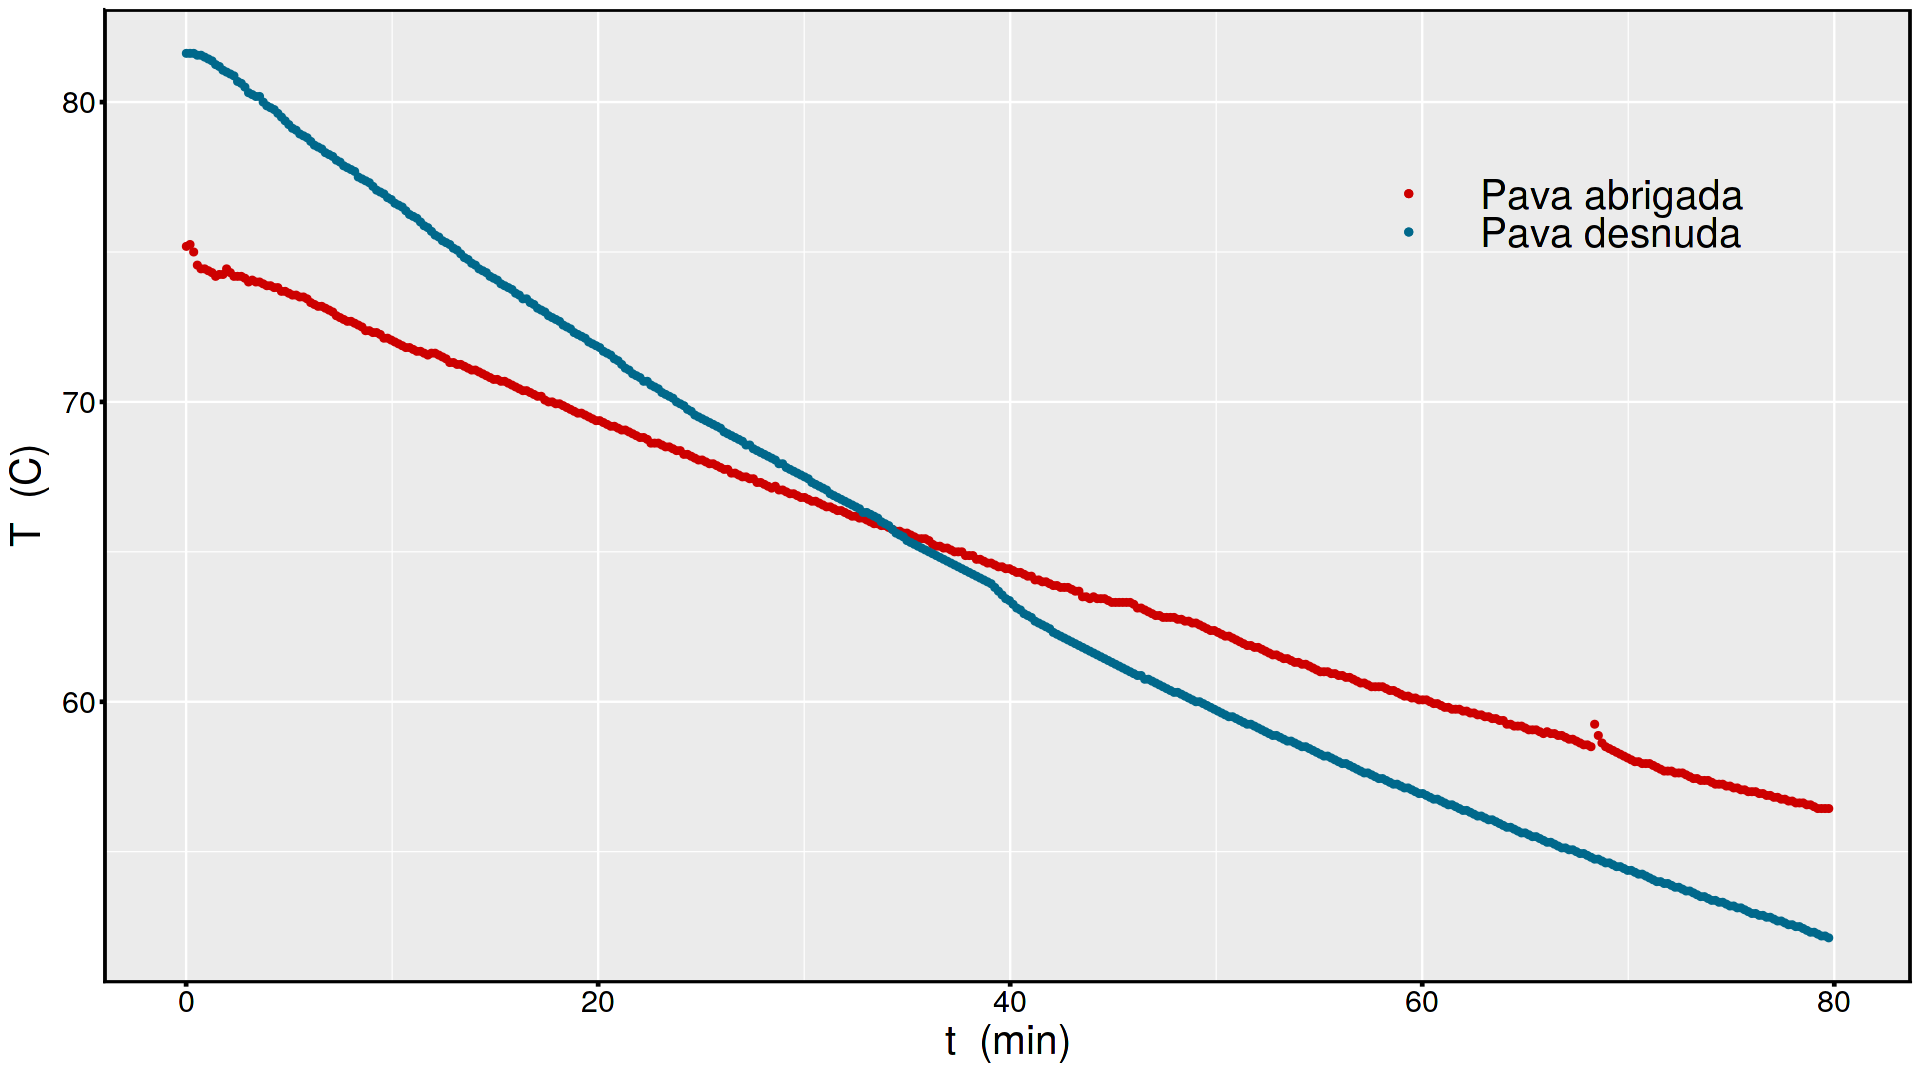

In [11]:
gtT <- ggplot() + 
geom_point(data = da,aes(x = t, y = T, colour = "Pava abrigada")) + 
geom_point(data = dsa, aes(x = t, y = T, colour = "Pava desnuda")) + 
scale_colour_manual(values = c("Pava abrigada" = "Red3", "Pava desnuda" = "DeepSkyBlue4"), name = NULL) + 
temajuan + theme(legend.position = c(0.8,0.8)) +
xlab(TeX("$t\\; (min)$")) + 
ylab(TeX("$T\\; (C)$")) 

fig(16,9)
show(gtT)

In [ ]:
da <- da[da$t < 38, ]
dsa <- dsa[dsa$t < 38, ]


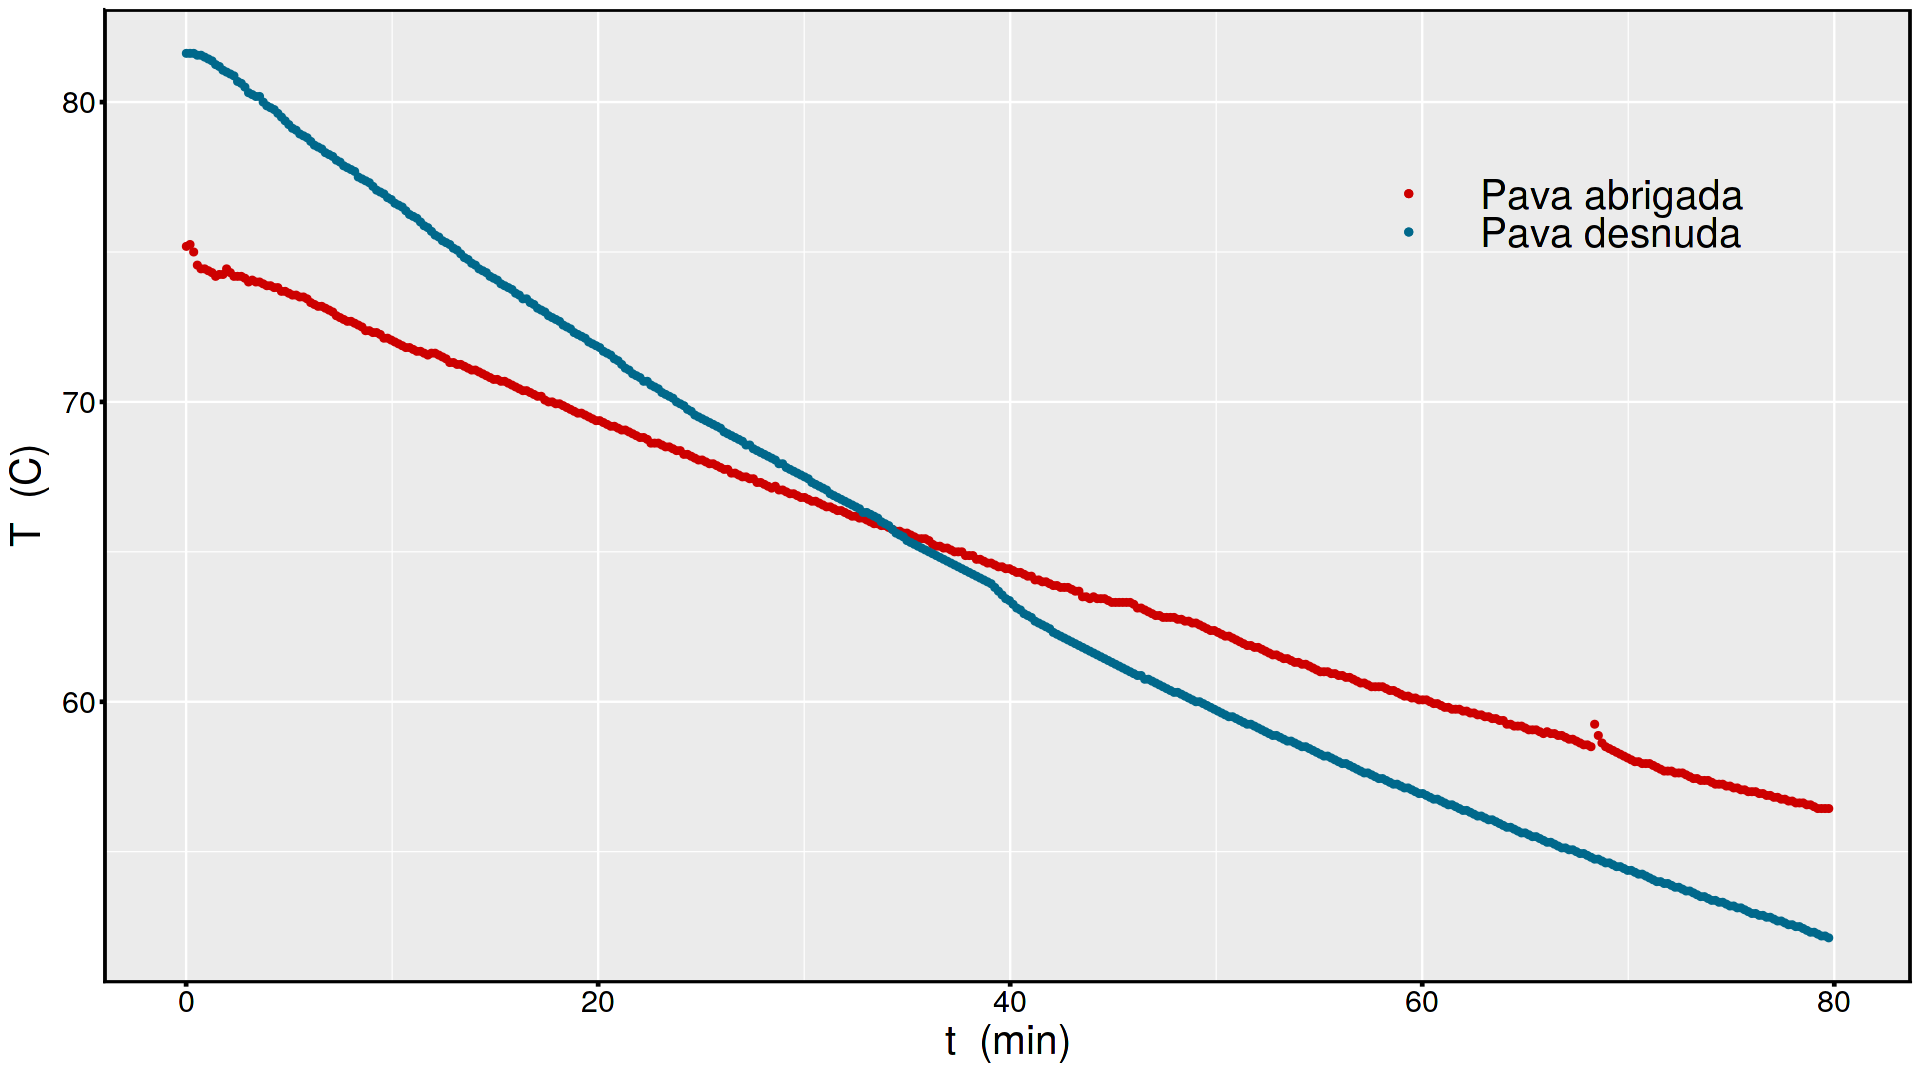

In [12]:
gtT <- ggplot() + 
geom_point(data = da,aes(x = t, y = T, colour = "Pava abrigada")) + 
geom_point(data = dsa, aes(x = t, y = T, colour = "Pava desnuda")) + 
scale_colour_manual(values = c("Pava abrigada" = "Red3", "Pava desnuda" = "DeepSkyBlue4"), name = NULL) + 
temajuan + theme(legend.position = c(0.8,0.8)) +
xlab(TeX("$t\\; (min)$")) + 
ylab(TeX("$T\\; (C)$")) 

fig(16,9)
show(gtT)

In [13]:
Tad <- 24.93
Taa <-21.43

In [14]:
dsa <- dsa[dsa$t > 3, ]
da <- da[da$t > 3, ]
da$t <- da$t - da$t[1]
dsa$t <- dsa$t - dsa$t[1]


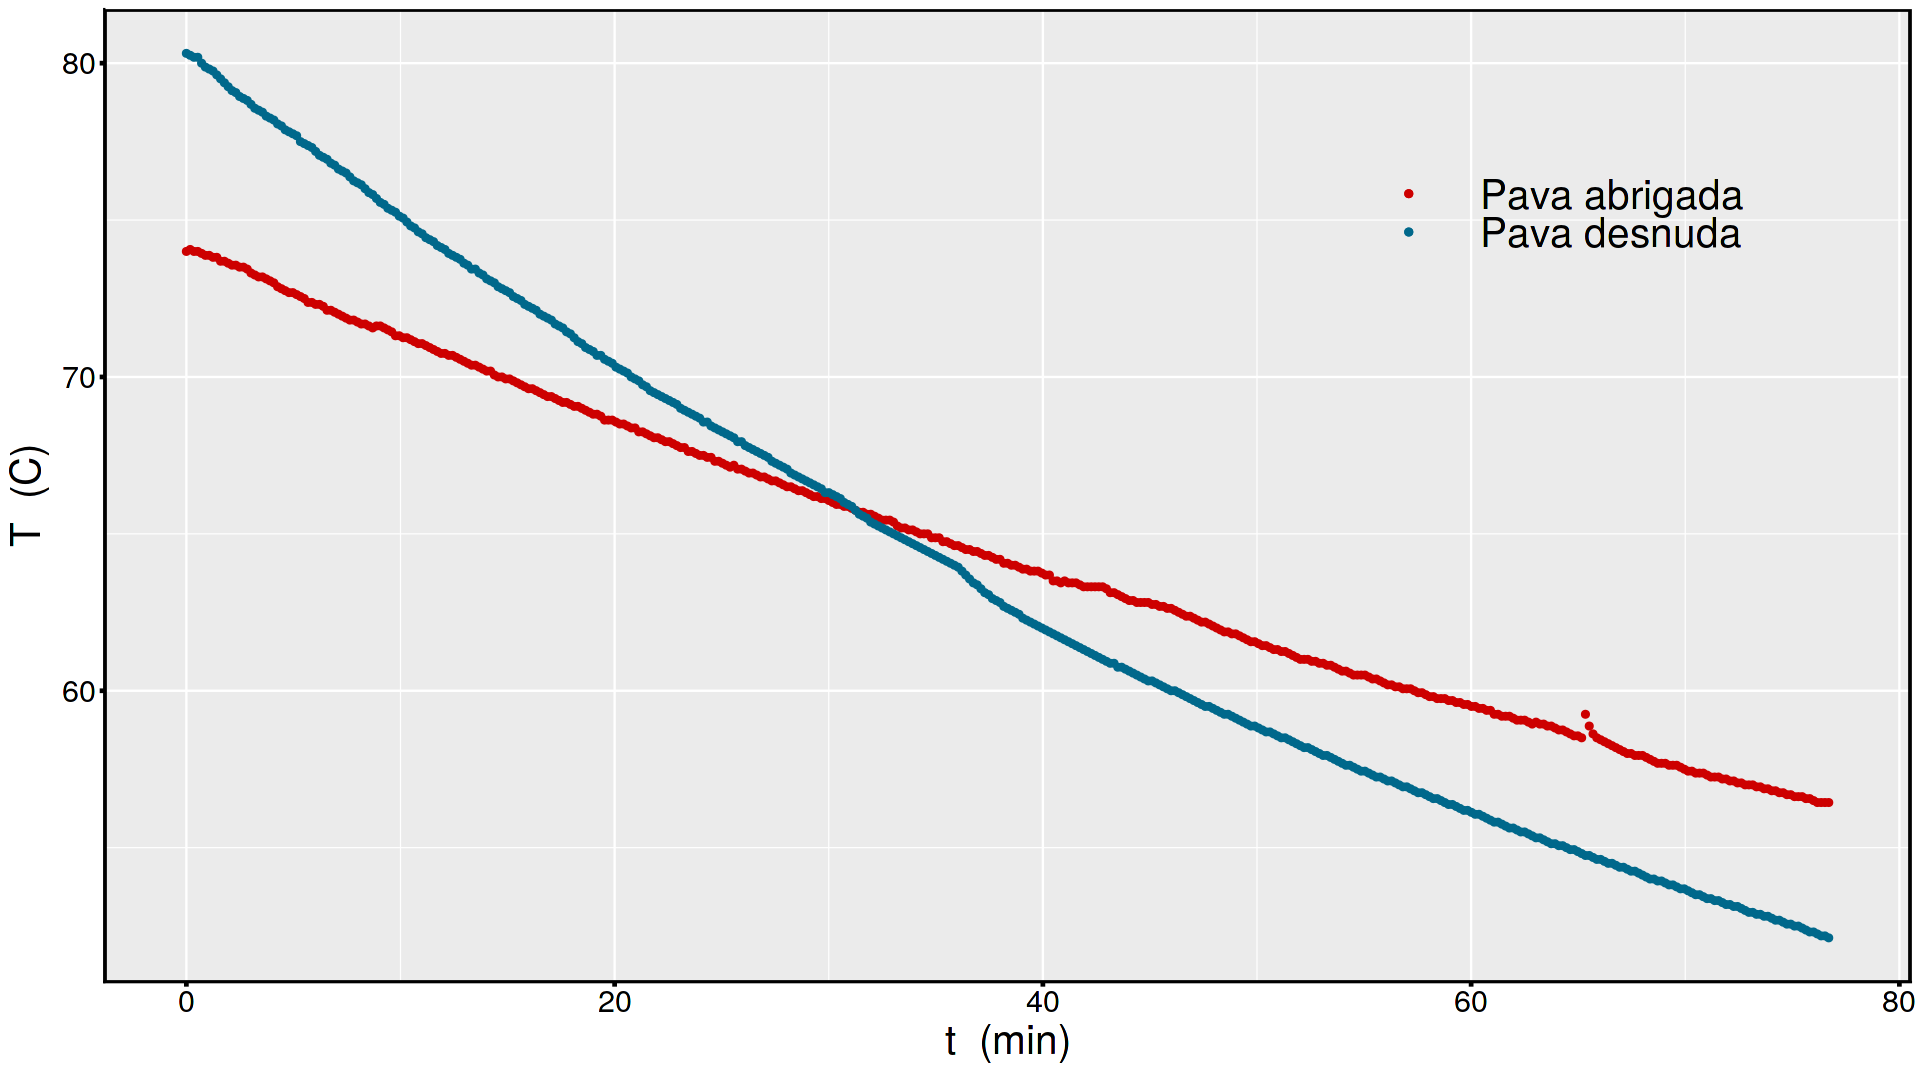

In [15]:
gtT <- ggplot() + 
geom_point(data = da,aes(x = t, y = T, colour = "Pava abrigada")) + 
geom_point(data = dsa, aes(x = t, y = T, colour = "Pava desnuda")) + 
scale_colour_manual(values = c("Pava abrigada" = "Red3", "Pava desnuda" = "DeepSkyBlue4"), name = NULL) + 
temajuan + theme(legend.position = c(0.8,0.8)) +
xlab(TeX("$t\\; (min)$")) + 
ylab(TeX("$T\\; (C)$")) 

fig(16,9)
show(gtT)

In [16]:
da$V <- (da$T - Taa)/(da$T[1] - Taa)
dsa$V <- (dsa$T - Tad)/(dsa$T[1] - Tad)

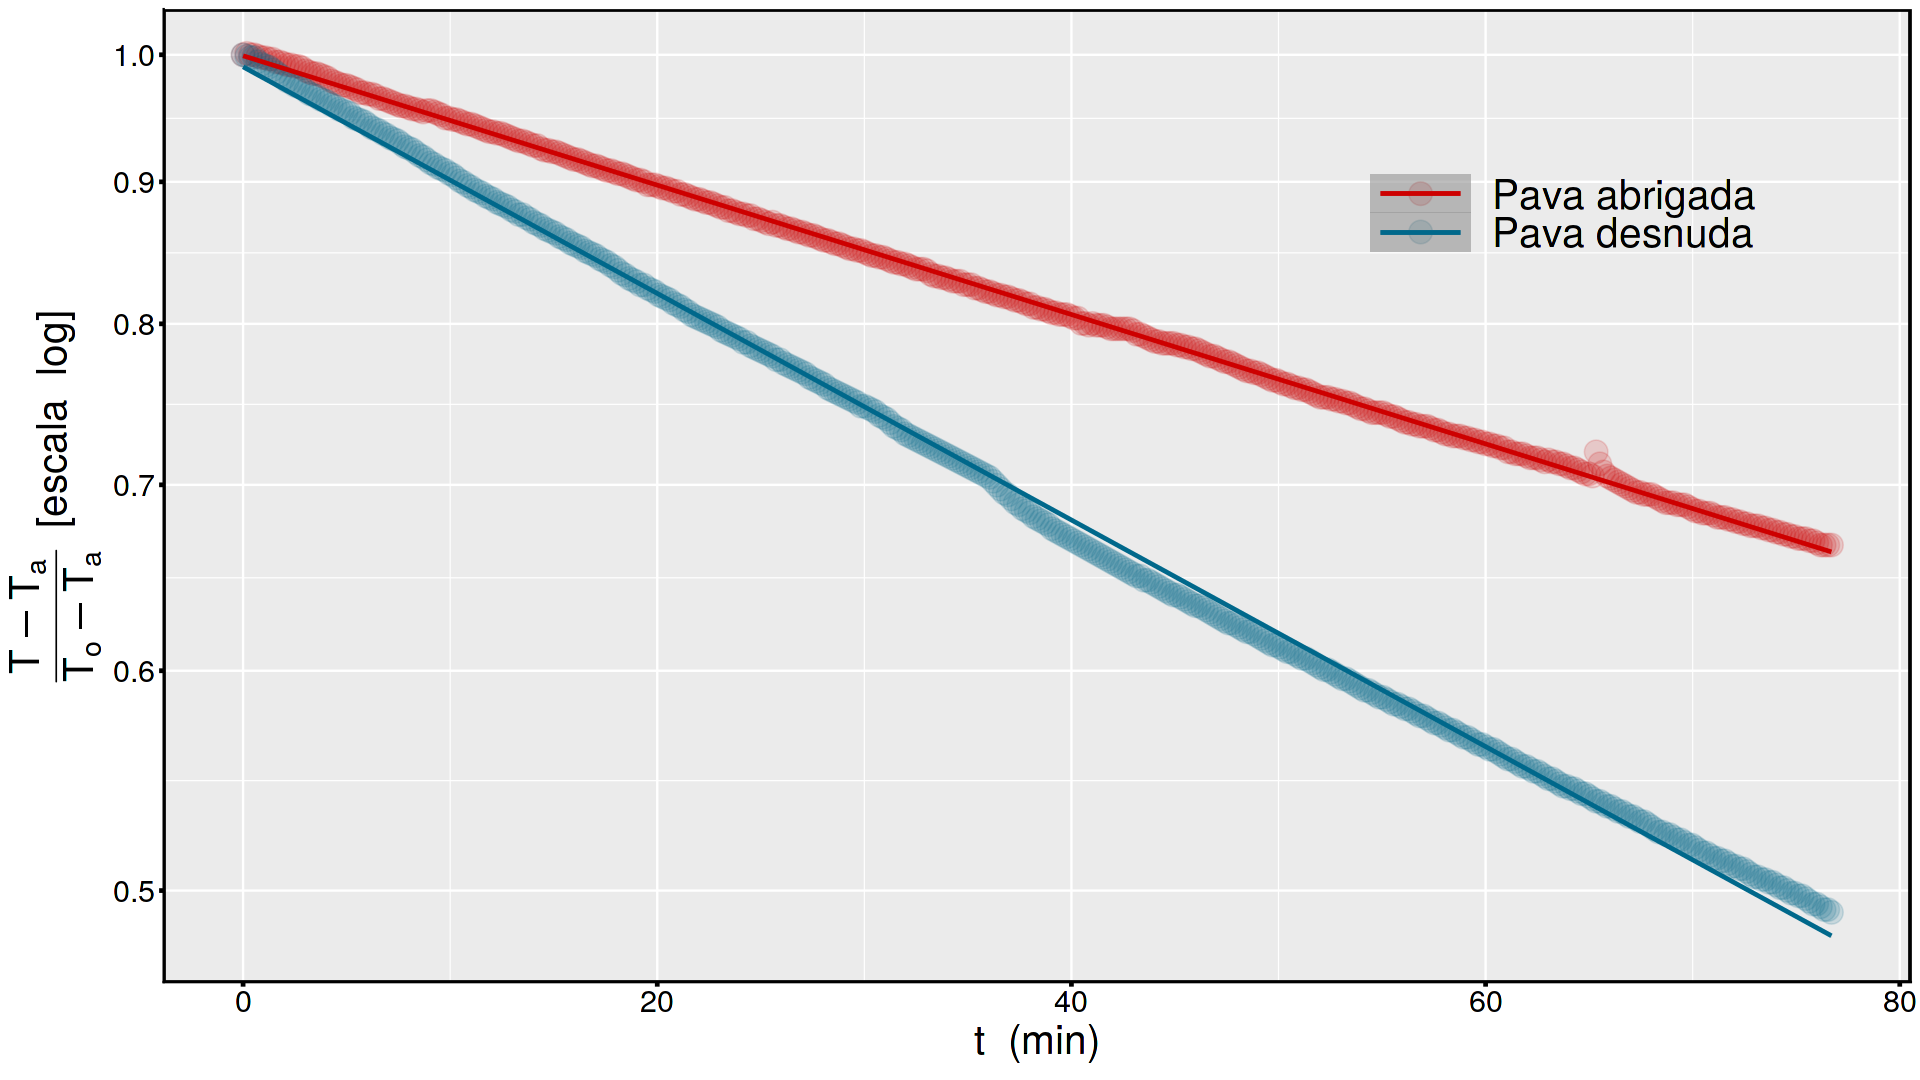

In [17]:
gtT <- ggplot() + 
geom_point(data = da,aes(x = t, y = V, colour = "Pava abrigada"), alpha = 0.15, size = 6) + 
geom_point(data = dsa, aes(x = t, y = V, colour = "Pava desnuda"), alpha = 0.15, size = 6) + 
scale_colour_manual(values = c("Pava abrigada" = "Red3", "Pava desnuda" = "DeepSkyBlue4"), name = NULL) + 
geom_smooth(data = dsa,aes(x = t, y = V, colour = "Pava desnuda"), method = "lm", formula = "y ~ x") + 
geom_smooth(data = da, aes(x = t, y = V, colour = "Pava abrigada"), method = "lm", formula = "y ~ x") + 
temajuan + theme(legend.position = c(0.8,0.8)) +
xlab(TeX("$t\\; (min)$")) + 
ylab(TeX("$\\frac{T - T_a}{T_o - T_a}\\; \\[escala \\; log\\]$")) + 
scale_y_continuous(trans = "log")

fig(16,9)
show(gtT)

In [18]:
head(da,3)

,t,T,V
,<dbl>,<dbl>,<dbl>
18,0.0000000,74.0000,1.000000
19,0.1776667,74.0625,1.001189
20,0.3551667,74.0000,1.000000


In [21]:
summary.lm(lm(log(da$V) ~ da$t))
summary.lm(lm(log(dsa$V) ~ dsa$t))


Call:
lm(formula = log(da$V) ~ da$t)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0048195 -0.0018693 -0.0002959  0.0015035  0.0220318 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -8.167e-04  2.394e-04   -3.412 0.000706 ***
da$t        -5.365e-03  5.402e-06 -993.010  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.002495 on 431 degrees of freedom
Multiple R-squared:  0.9996,	Adjusted R-squared:  0.9996 
F-statistic: 9.861e+05 on 1 and 431 DF,  p-value: < 2.2e-16



Call:
lm(formula = log(dsa$V) ~ dsa$t)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0170396 -0.0052973  0.0000488  0.0068477  0.0200553 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.000e-02  8.690e-04  -11.51   <2e-16 ***
dsa$t       -9.396e-03  1.961e-05 -479.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.009057 on 431 degrees of freedom
Multiple R-squared:  0.9981,	Adjusted R-squared:  0.9981 
F-statistic: 2.295e+05 on 1 and 431 DF,  p-value: < 2.2e-16
